In [ ]:
%matplotlib inline


# Plot Ridge coefficients as a function of the regularization


Shows the effect of collinearity in the coefficients of an estimator.

.. currentmodule:: sklearn.linear_model

:class:`Ridge` Regression is the estimator used in this example.
Each color represents a different feature of the
coefficient vector, and this is displayed as a function of the
regularization parameter.

This example also shows the usefulness of applying Ridge regression
to highly ill-conditioned matrices. For such matrices, a slight
change in the target variable can cause huge variances in the
calculated weights. In such cases, it is useful to set a certain
regularization (alpha) to reduce this variation (noise).

When alpha is very large, the regularization effect dominates the
squared loss function and the coefficients tend to zero.
At the end of the path, as alpha tends toward zero
and the solution tends towards the ordinary least squares, coefficients
exhibit big oscillations. In practise it is necessary to tune alpha
in such a way that a balance is maintained between both.


In [2]:
# Author: Fabian Pedregosa -- <fabian.pedregosa@inria.fr>
# License: BSD 3 clause

print(__doc__)

import numpy as np
import matplotlib.pyplot as plt
from sklearn import linear_model

# X is the 10x10 Hilbert matrix
X = 1. / (np.arange(1, 11) + np.arange(0, 10)[:, np.newaxis])
y = np.ones(10)

Automatically created module for IPython interactive environment


Compute paths


In [13]:
n_alphas = 200
alphas = np.logspace(-10, -2, n_alphas)
clf = linear_model.Ridge(fit_intercept=False)

coefs = []
for a in alphas:
    clf.set_params(alpha=a)
    clf.fit(X, y)
    #print "hello world",clf.coef_
    coefs.append(clf.coef_)
    #print len(coefs)

Display results


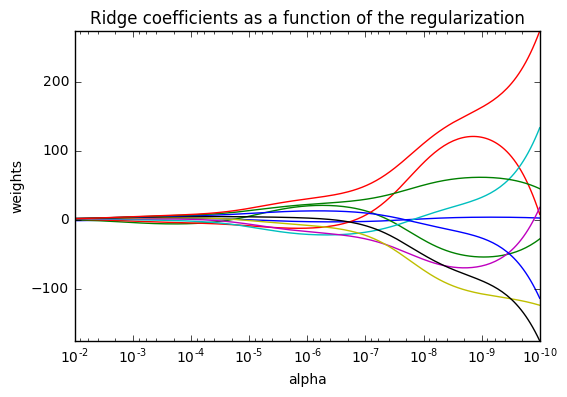

In [17]:
ax = plt.gca()

ax.plot(alphas, coefs)
ax.set_xscale('log')
ax.set_xlim(ax.get_xlim()[::-1])  # reverse axis
plt.xlabel('alpha')
plt.ylabel('weights')
plt.title('Ridge coefficients as a function of the regularization')
plt.axis('tight')
plt.show()